In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023-Model.csv')
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:00:00,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,3820851,Sedan,Driver Inattention,Winter,Late Night,False
2,2018-01-01 00:00:00,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,3822296,Station Wagon/Sport Utility Vehicle,Driver Inattention,Winter,Late Night,False
3,2018-01-01 00:00:00,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False
4,2018-01-01 00:00:00,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,3821055,Taxi,Driver Inattention,Winter,Late Night,False


In [3]:
# Create a new column 'IF NIGHT' based on whether 'Night' appears in the 'TIME OF DAY' column
df['IF NIGHT'] = df['TIME OF DAY'].apply(lambda x: True if x == 'Night' else False)
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT
0,2018-01-01 00:00:00,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False,False
1,2018-01-01 00:00:00,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,3820851,Sedan,Driver Inattention,Winter,Late Night,False,False
2,2018-01-01 00:00:00,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,3822296,Station Wagon/Sport Utility Vehicle,Driver Inattention,Winter,Late Night,False,False
3,2018-01-01 00:00:00,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False,False
4,2018-01-01 00:00:00,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,3821055,Taxi,Driver Inattention,Winter,Late Night,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   BOROUGH                        213962 non-null  object 
 2   ZIP CODE                       213962 non-null  int64  
 3   LATITUDE                       213962 non-null  float64
 4   LONGITUDE                      213962 non-null  float64
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 8   COLLISION_ID                   213962 non-null  int64  
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

#### Changing DateTime Index

In [5]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

In [6]:
#Set to datetime index
#df.set_index('CRASH DATE TIME', inplace=True)

In [7]:
#Review the contributing factors
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(sort=True).head()

Driver Inattention/Distraction    73922
Failure to Yield Right-of-Way     25286
Following Too Closely             15919
Backing Unsafely                  15133
Passing Too Closely               12749
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [8]:
df['CONTRIBUTING CATEGORY V1'].value_counts()

Moving Violation               104522
Driver Inattention              83365
Third-Party (Vehicular)          8118
Bodily Impairment                6326
Environmental Factors            3473
Road Conditions                  2457
Vehicle Defects                  2323
Third-Party (Non-Vehicular)      1972
Other Distractions               1241
Internal Electronics Usage        165
Name: CONTRIBUTING CATEGORY V1, dtype: int64

In [9]:
df['CONTRIBUTING CATEGORY V1'] == 'Moving Violation'

0          True
1         False
2         False
3          True
4         False
          ...  
213957     True
213958     True
213959    False
213960    False
213961     True
Name: CONTRIBUTING CATEGORY V1, Length: 213962, dtype: bool

In [10]:
mv_de = df.loc[df['CONTRIBUTING CATEGORY V1'].isin(['Moving Violation', 'Driver Error'])]
mv_de

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT
0,2018-01-01 00:00:00,QUEENS,11419,40.682970,-73.828240,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False,False
3,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False,False
5,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.952810,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False,False
6,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.906220,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
7,2018-01-01 00:27:00,QUEENS,11419,40.689133,-73.820860,0,0,Failure to Yield Right-of-Way,3821878,Sedan,Moving Violation,Winter,Late Night,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213953,2022-12-31 21:00:00,BROOKLYN,11203,40.651650,-73.932045,2,0,Following Too Closely,4594617,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Night,False,True
213955,2022-12-31 21:20:00,QUEENS,11106,40.759884,-73.936800,1,0,Failure to Yield Right-of-Way,4596703,Sedan,Moving Violation,Winter,Night,False,True
213957,2022-12-31 22:02:00,QUEENS,11102,40.766150,-73.919785,2,0,Following Too Closely,4594338,Sedan,Moving Violation,Winter,Night,False,True
213958,2022-12-31 22:10:00,BROOKLYN,11221,40.697582,-73.929830,0,0,Passing or Lane Usage Improper,4594636,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Night,False,True


In [11]:
mv = df[df['CONTRIBUTING CATEGORY V1'] == 'Moving Violation']
de = df[df['CONTRIBUTING CATEGORY V1'] == 'Driver Error']

mv
de

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT


### Season

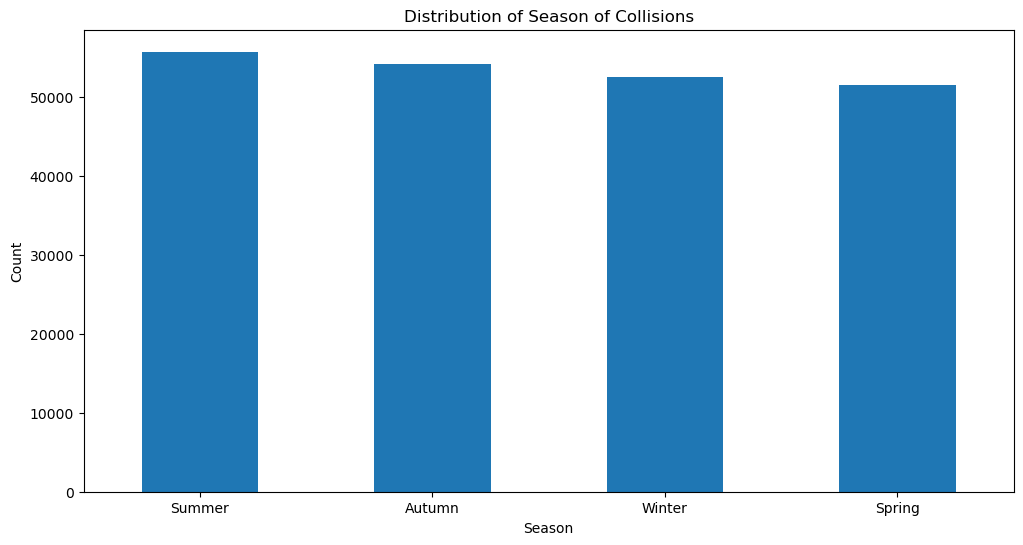

In [12]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['SEASON'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Season');
ax.set_ylabel('Count')
ax.set_title('Distribution of Season of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Time of Day

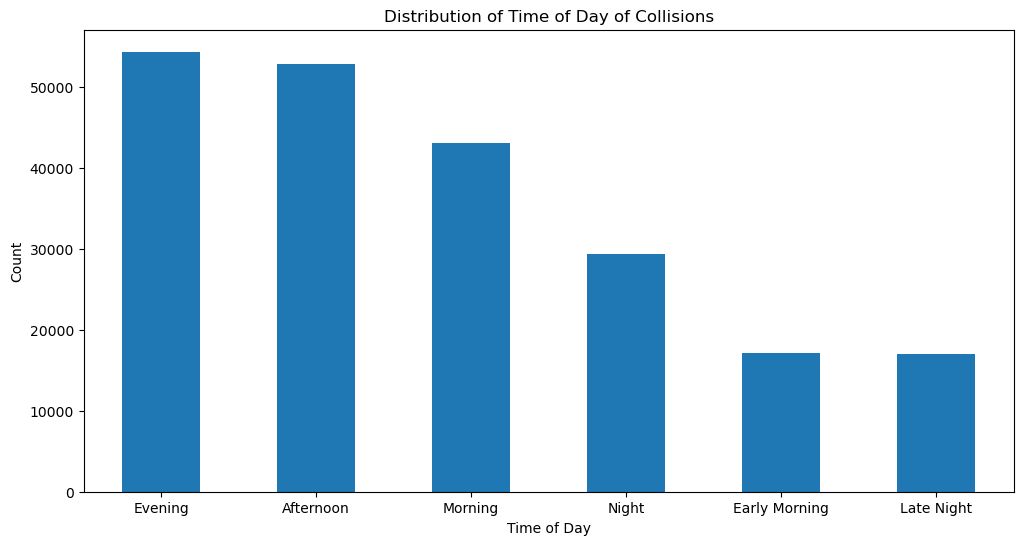

In [13]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['TIME OF DAY'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Time of Day');
ax.set_ylabel('Count')
ax.set_title('Distribution of Time of Day of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Rush Hour

In [14]:
df['IS RUSH HOUR'].value_counts()

False    143320
True      70642
Name: IS RUSH HOUR, dtype: int64

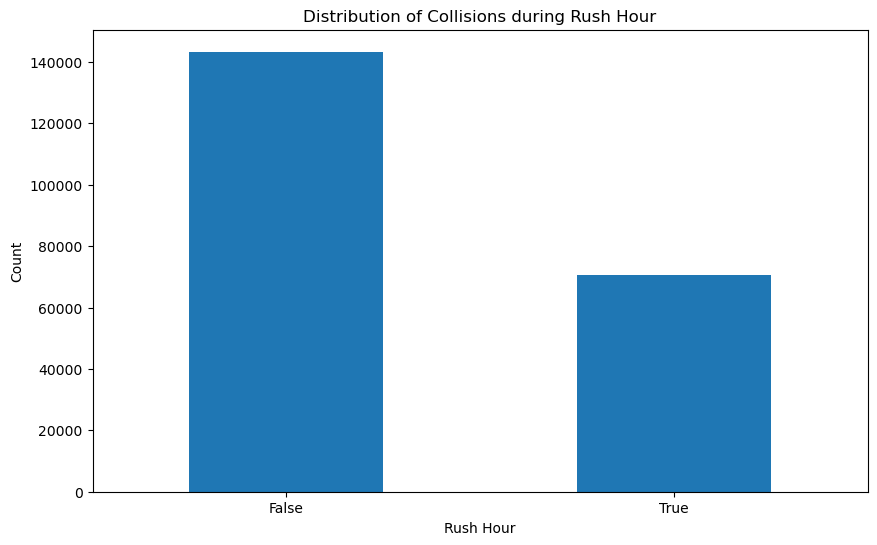

In [15]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['IS RUSH HOUR'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Rush Hour');
ax.set_ylabel('Count')
ax.set_title('Distribution of Collisions during Rush Hour')
ax.tick_params(axis='x', labelrotation=0);

## Zip Code

In [16]:
df['ZIP CODE'].value_counts().head(10)

11207    6756
11234    5003
11101    4990
11385    4715
11236    4622
11211    4601
11206    4562
11368    4424
11208    4279
11201    4217
Name: ZIP CODE, dtype: int64

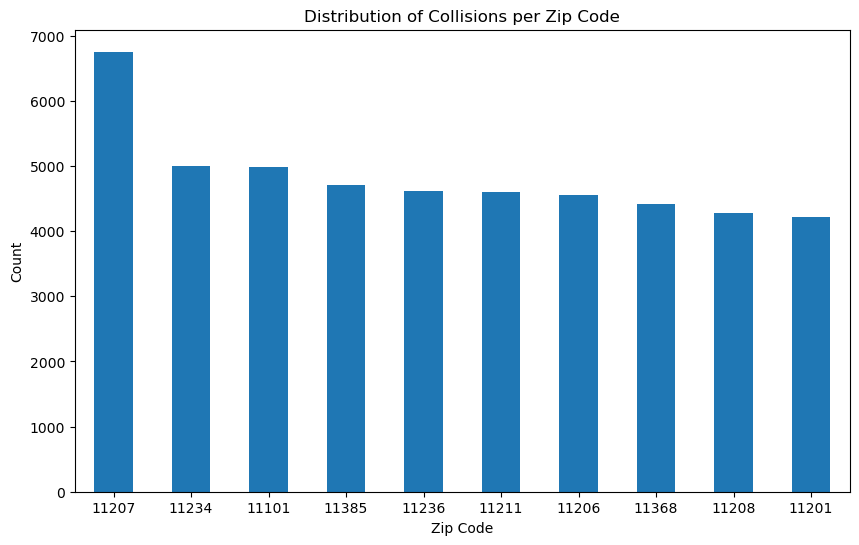

In [17]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['ZIP CODE'].value_counts().head(10).plot(kind='bar')

# Customize appearance
ax.set_xlabel('Zip Code');
ax.set_ylabel('Count')
ax.set_title('Distribution of Collisions per Zip Code')
ax.tick_params(axis='x', labelrotation=0);

### Contributing Factor Graphs

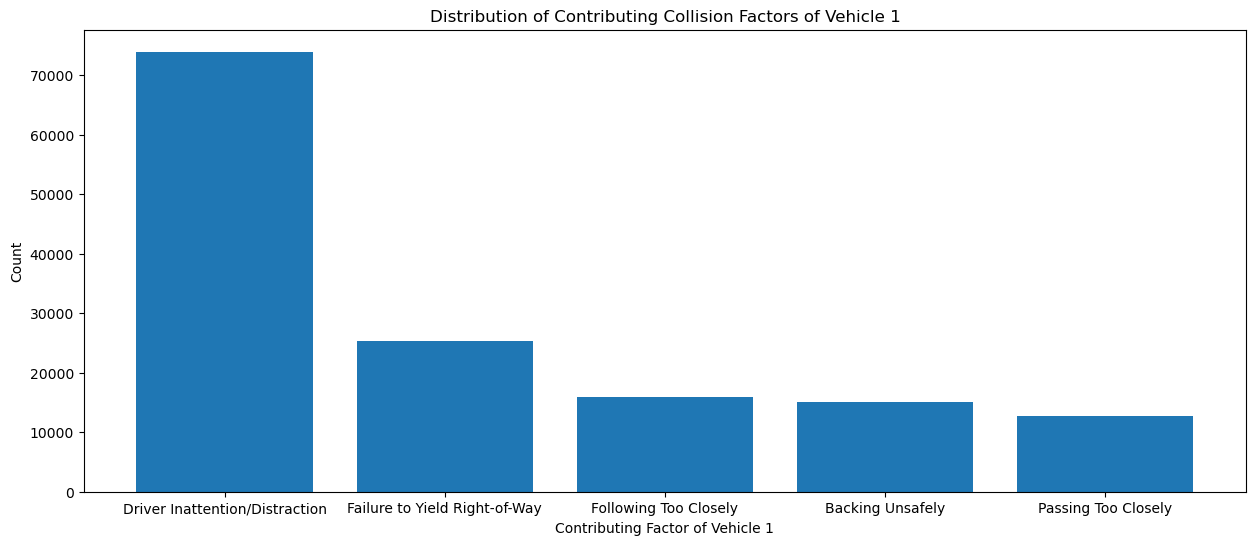

In [18]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts.index, causes_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 1');

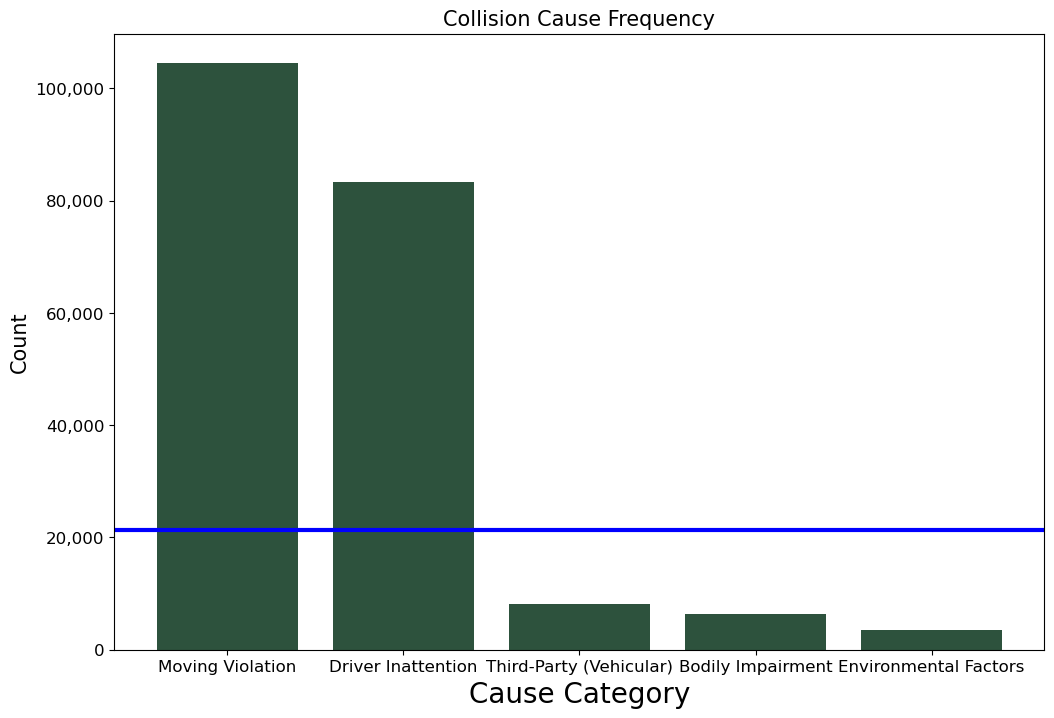

In [19]:
#Set up plots
fig, (ax) = plt.subplots(figsize=(12,8))

#Create variable for easier reuse
category_counts = df['CONTRIBUTING CATEGORY V1'].value_counts()[:5]

#Plot bar chart 
ax.bar(category_counts.index, category_counts.values,color='#2d523d')

#Customize appearance
ax.set_xlabel('Cause Category', fontsize = 20)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Collision Cause Frequency', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

ax.axhline(y=df['CONTRIBUTING CATEGORY V1'].value_counts().mean(), color='b', linewidth=3);

In [20]:
df['CONTRIBUTING CATEGORY V1'].value_counts(normalize=True) * 100


Moving Violation               48.850731
Driver Inattention             38.962526
Third-Party (Vehicular)         3.794132
Bodily Impairment               2.956600
Environmental Factors           1.623185
Road Conditions                 1.148335
Vehicle Defects                 1.085707
Third-Party (Non-Vehicular)     0.921659
Other Distractions              0.580010
Internal Electronics Usage      0.077116
Name: CONTRIBUTING CATEGORY V1, dtype: float64

In [21]:
df['CONTRIBUTING CATEGORY V1'].value_counts().mean()

21396.2

In [22]:
df['CONTRIBUTING CATEGORY V1'].value_counts().describe()

count        10.000000
mean      21396.200000
std       38631.405131
min         165.000000
25%        2059.750000
50%        2965.000000
75%        7670.000000
max      104522.000000
Name: CONTRIBUTING CATEGORY V1, dtype: float64

In [25]:
df['CONTRIBUTING CATEGORY V1'].value_counts().sum().mean()/1000

213.962

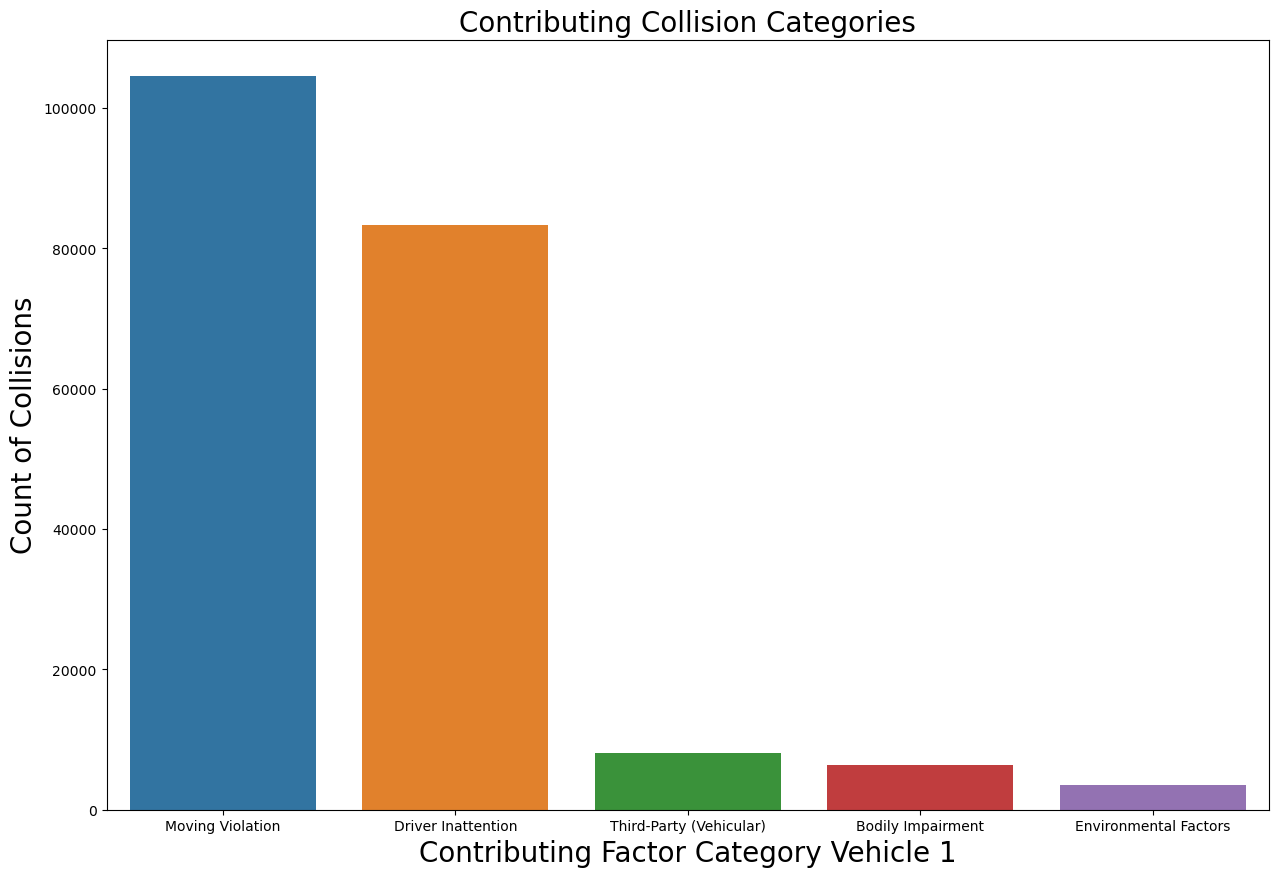

In [26]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=df['CONTRIBUTING CATEGORY V1'].value_counts()[:5].index, 
            y=df['CONTRIBUTING CATEGORY V1'].value_counts()[:5].values)
ax.set_xlabel('Contributing Factor Category Vehicle 1', fontsize = 20)
ax.set_ylabel('Count of Collisions', fontsize = 20)
ax.set_title('Contributing Collision Categories', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
#ax.set_xticklabels(['Average','Good', 'Very Good'])
#ax.tick_params(axis='both', which='major', labelsize=12);

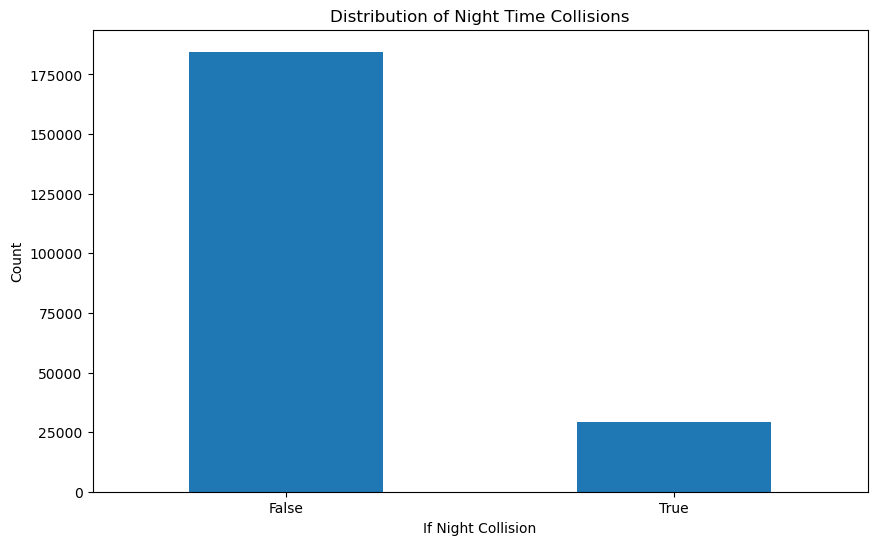

In [27]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['IF NIGHT'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('If Night Collision');
ax.set_ylabel('Count')
ax.set_title('Distribution of Night Time Collisions')
ax.tick_params(axis='x', labelrotation=0);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE TIME                213962 non-null  datetime64[ns]
 1   BOROUGH                        213962 non-null  object        
 2   ZIP CODE                       213962 non-null  int64         
 3   LATITUDE                       213962 non-null  float64       
 4   LONGITUDE                      213962 non-null  float64       
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64         
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object        
 8   COLLISION_ID                   213962 non-null  int64         
 9   VEHICLE TYPE CODE 1            213962 non-null  object        
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object        
 11  

In [29]:
#calculate sum of sales grouped by day
#df.groupby(df.DATETIME.dt.day)['CONTRIBUTING FACTOR VEHICLE 1'].sum()


### Group by

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE TIME                213962 non-null  datetime64[ns]
 1   BOROUGH                        213962 non-null  object        
 2   ZIP CODE                       213962 non-null  int64         
 3   LATITUDE                       213962 non-null  float64       
 4   LONGITUDE                      213962 non-null  float64       
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64         
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object        
 8   COLLISION_ID                   213962 non-null  int64         
 9   VEHICLE TYPE CODE 1            213962 non-null  object        
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object        
 11  

In [31]:
#Group the values by day and count the number of instances of each value
v1_cat_count = df.groupby([df['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Print the result
print(v1_cat_count)

      CRASH DATE TIME CONTRIBUTING CATEGORY V1  count
0          2018-01-01        Bodily Impairment      4
1          2018-01-01       Driver Inattention     45
2          2018-01-01    Environmental Factors      2
3          2018-01-01         Moving Violation     72
4          2018-01-01       Other Distractions      2
...               ...                      ...    ...
12954      2022-12-31        Bodily Impairment      6
12955      2022-12-31       Driver Inattention     29
12956      2022-12-31    Environmental Factors      4
12957      2022-12-31         Moving Violation     34
12958      2022-12-31  Third-Party (Vehicular)      2

[12959 rows x 3 columns]


In [32]:
#Create pivot table of daily cause categories
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
pivot_table

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Inattention,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-01,4.0,45.0,2.0,0.0,72.0,2.0,5.0,0.0,5.0,1.0
2018-01-02,1.0,73.0,8.0,0.0,83.0,3.0,3.0,2.0,9.0,6.0
2018-01-03,3.0,86.0,2.0,1.0,105.0,1.0,0.0,3.0,8.0,1.0
2018-01-04,4.0,25.0,2.0,0.0,43.0,0.0,46.0,0.0,4.0,3.0
2018-01-05,2.0,53.0,4.0,0.0,114.0,0.0,45.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.0,15.0,0.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0
2022-12-28,5.0,26.0,2.0,0.0,31.0,0.0,1.0,0.0,2.0,1.0
2022-12-29,1.0,15.0,0.0,0.0,29.0,1.0,1.0,0.0,2.0,0.0


In [33]:
#Change to a dataframe
daily_v1cat = pd.DataFrame(v1_cat_count)

#changing the index
daily_v1cat.set_index('CRASH DATE TIME', inplace=True)#changing the index

daily_v1cat

,CONTRIBUTING CATEGORY V1,count
CRASH DATE TIME,,
2018-01-01,Bodily Impairment,4
2018-01-01,Driver Inattention,45
2018-01-01,Environmental Factors,2
2018-01-01,Moving Violation,72
2018-01-01,Other Distractions,2
...,...,...
2022-12-31,Bodily Impairment,6
2022-12-31,Driver Inattention,29
2022-12-31,Environmental Factors,4


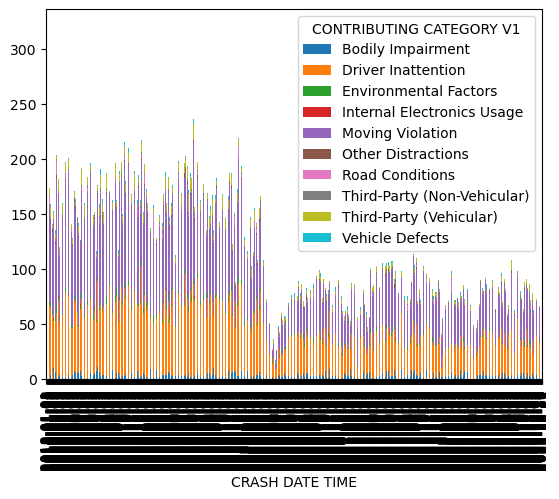

In [34]:
# create a pivot table to reshape the data for plotting
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

# create a bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True)

# display the chart
plt.show()

In [35]:
#Group the values by year and count the number of instances of each value
v1_cat_yearcount = df.groupby([df['CRASH DATE TIME'].dt.year, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Create pivot table of daily cause categories
yearly_cat_pivt = v1_cat_yearcount.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
yearly_cat_pivt

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Inattention,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018,1449,23770,1054,55,32652,378,870,516,2367,581
2019,1445,23943,990,31,29795,370,656,440,2375,629
2020,1074,12770,535,25,14097,177,354,310,1256,389
2021,1220,11806,460,26,14389,168,321,360,1181,401
2022,1138,11076,434,28,13589,148,256,346,939,323


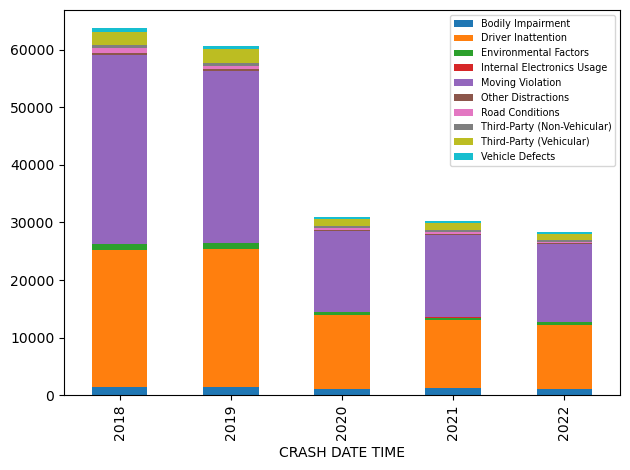

In [36]:
# Set up plots
#fig, ax = plt.subplots(figsize=(13, 6))

# create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar', stacked=True)

#Legend
plt.legend(loc='upper right', fontsize='x-small')
plt.tight_layout()

# display the chart
plt.show();

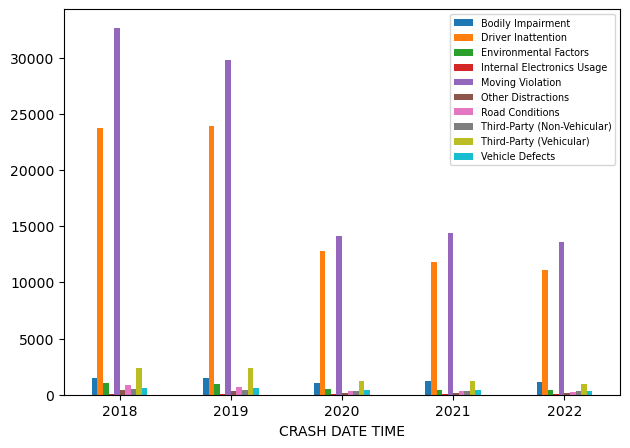

In [37]:
#fig, ax = plt.subplots(figsize=(15, 8))


#Create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar')

#Legend
plt.legend(loc='upper right', fontsize='x-small')
plt.tight_layout()

#Rotate x-axis ticks
plt.tick_params(axis='x', labelrotation=0)

#Display the chart
plt.show();

### Vehicle Type

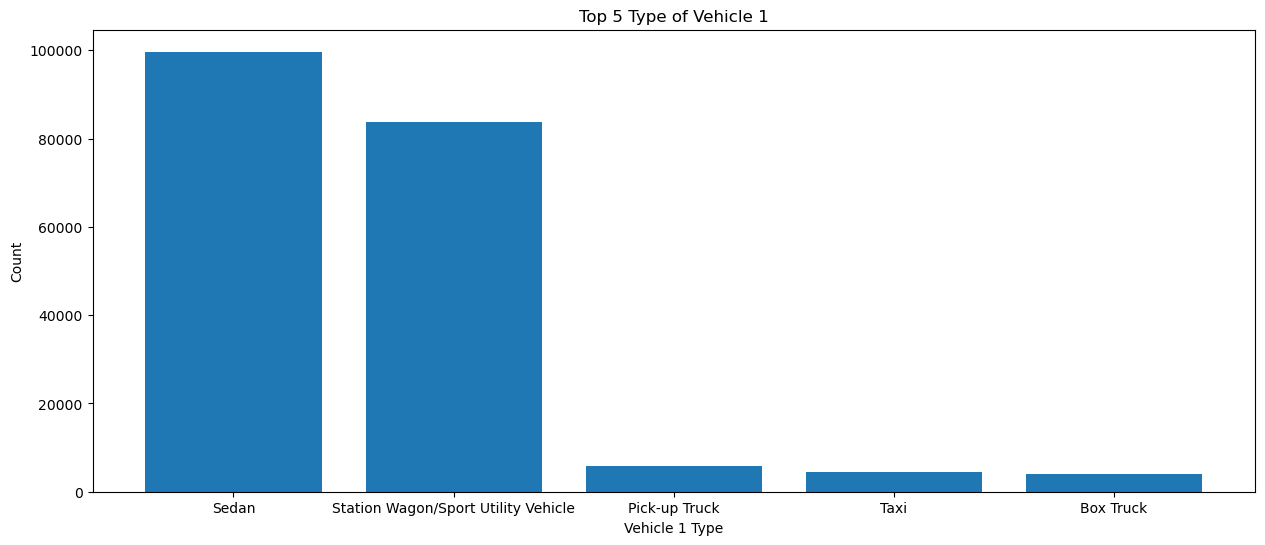

In [38]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
V1type_count = df['VEHICLE TYPE CODE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(V1type_count.index, V1type_count.values)

# Customize appearance
ax.set_xlabel('Vehicle 1 Type');
ax.set_ylabel('Count')
ax.set_title('Top 5 Type of Vehicle 1');

In [39]:
#Group the values by day and count the number of instances of each value
mv_count = mv.groupby('ZIP CODE').size().reset_index(name='count')

#Print the result
mv_count

,ZIP CODE,count
0,11001,56
1,11004,254
2,11005,9
3,11040,46
4,11101,1484
...,...,...
98,11692,215
99,11693,185
100,11694,213
101,11695,1


In [40]:
mv

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT
0,2018-01-01 00:00:00,QUEENS,11419,40.682970,-73.828240,0,0,Passing Too Closely,3819067,Sedan,Moving Violation,Winter,Late Night,False,False
3,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False,False
5,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.952810,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False,False
6,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.906220,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
7,2018-01-01 00:27:00,QUEENS,11419,40.689133,-73.820860,0,0,Failure to Yield Right-of-Way,3821878,Sedan,Moving Violation,Winter,Late Night,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213953,2022-12-31 21:00:00,BROOKLYN,11203,40.651650,-73.932045,2,0,Following Too Closely,4594617,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Night,False,True
213955,2022-12-31 21:20:00,QUEENS,11106,40.759884,-73.936800,1,0,Failure to Yield Right-of-Way,4596703,Sedan,Moving Violation,Winter,Night,False,True
213957,2022-12-31 22:02:00,QUEENS,11102,40.766150,-73.919785,2,0,Following Too Closely,4594338,Sedan,Moving Violation,Winter,Night,False,True
213958,2022-12-31 22:10:00,BROOKLYN,11221,40.697582,-73.929830,0,0,Passing or Lane Usage Improper,4594636,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Night,False,True


In [41]:
import plotly.express as px

fig = px.choropleth(mv_count,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='value',
                    color_continuous_scale="Viridis_r",      
                    )
fig.update_layout(
      title_text = 'Mean Home Value by State, 1996 - 2018',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['ZIP CODE', 'count'] but received: State